# **Importing data and libraries**




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
import sklearn
import matplotlib.pyplot as plt
from operator import itemgetter

In [ ]:
originaldf = pd.read_csv('CarPrice_Assignment.csv')
df = pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
originaldf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **Label encoding str type variables**

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
for i in range(df.columns.size):
  if type(df[df.columns[i]][0]) == str:
    df[df.columns[i]] = le.fit_transform(df[df.columns[i]])

# **Normalization**

In [ ]:
for column in df.columns:
  df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())

In [ ]:
df. rename(columns = {'car_ID':'BIAS'}, inplace = True)
df = df.assign(BIAS = 1)

In [ ]:
df.head()

,BIAS,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,1,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,1,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,1,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,1,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


# **Partition data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [ ]:
x = train[train.columns[0:-1]].to_numpy()
x_test = test[test.columns[0:-1]].to_numpy()

In [ ]:
y = train[train.columns[-1]].to_numpy()
y = y.reshape(y.shape[0],1)
y_test = test[test.columns[-1]].to_numpy()
y_test = y_test.reshape(y_test.shape[0],1)

# **Linear reg from Scratch**

In [ ]:
def initialize_weights(input):
  global weights
  weights = np.ones((input.shape[1],1))
  return weights

In [ ]:
def calculate_cost(hypothesis,output):
  global cost, error
  cost = ((hypothesis - output)**2).mean()
  error = hypothesis - output
  print('mae = ',abs(error).mean(), '\nmse =', cost)

In [ ]:
def update_weights(input, error, weights, alpha):
  weights = weights - (alpha*(input.T)@error)
  return weights

In [ ]:
def optimize_weights(input, output, weights, epoch, alpha):
  J = np.zeros(shape = (epoch,1))
  for i in range(epoch):
    J[i] = (((input@weights) - output)**2).mean()
    error = (input@weights) - output
    weights = weights - (alpha)*((input.T)@((input@weights) - output))
  #print(J[-1])
  #plt.plot(J)
  return J, weights

In [ ]:
abs((x_test@(optimize_weights(x,y,initialize_weights(x), 50000,0.0019))[1]  - y_test)**2).mean()

4.036296449732178e+274

***Grid*** ***Search***

In [ ]:
def grid_search(a,b,d,epoch):
  global costs, learning_rates,best_rate
  learning_rates = np.linspace(a, b, num=d)
  costs = []
  for i in (learning_rates):
    costs.append(abs((x_test@(optimize_weights(x,y,initialize_weights(x), epoch,i))[1]  - y_test)**2).mean())
  costs = np.array(costs)
  costs_for_rates = np.vstack((costs,learning_rates)).T
  costs_for_rates = sorted(costs_for_rates, key = itemgetter(0))
  best_rate = costs_for_rates[0][1]
  print('best cost = ', costs_for_rates[0][0],'\nbest learning rate =',costs_for_rates[0][1])

# **Results**

In [ ]:
grid_search(1e-5,1.9e-3,100, 50000)

best cost =  0.0036726956967110544 
best learning rate = 6.727272727272727e-05


array([0.00433553])

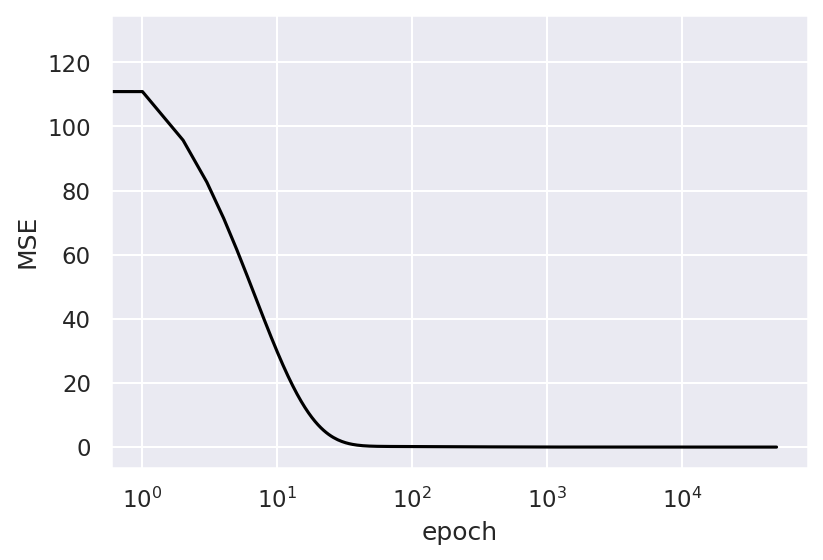

In [ ]:
J, weights  = optimize_weights(x,y,initialize_weights(x), 50000,best_rate)
plt.plot(J, color = 'black')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("epoch")
plt.ylabel("MSE")
J[-1]

In [ ]:
calculate_cost(x_test@weights,y_test)

mae =  0.04817131416544659 
mse = 0.0036726956967110544


In [ ]:
mat = np.hstack((x_test@weights,y_test))
mat = sorted(mat, key = itemgetter(1))

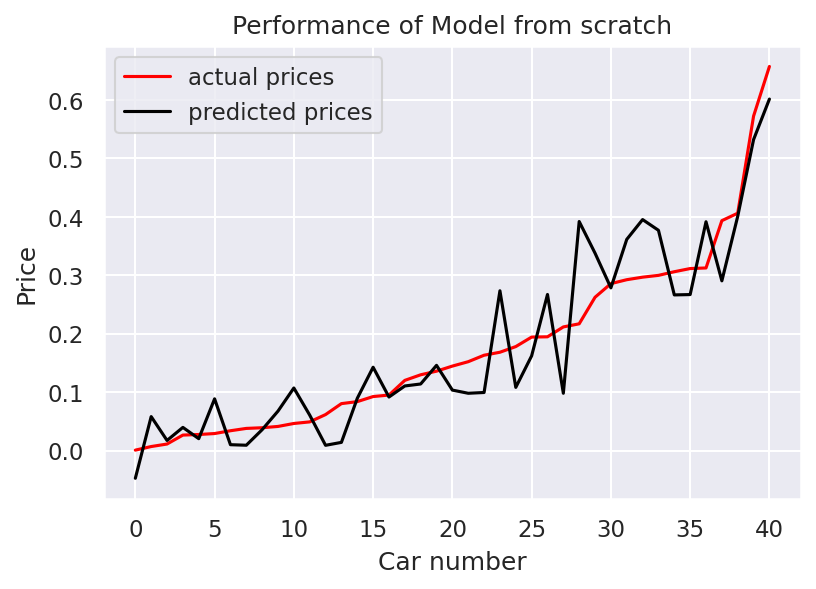

In [ ]:
plt.figure(dpi = 150)
plt.plot([i[1] for i in mat], color = 'red',label = "actual prices")
plt.plot([i[0] for i in mat],color = 'black',label = "predicted prices")
plt.xlabel("Car number")
plt.ylabel("Price")
plt.title("Performance of Model from scratch")
plt.legend(loc="upper left")

Text(0.5, 18.666666666666664, 'Absolute error')

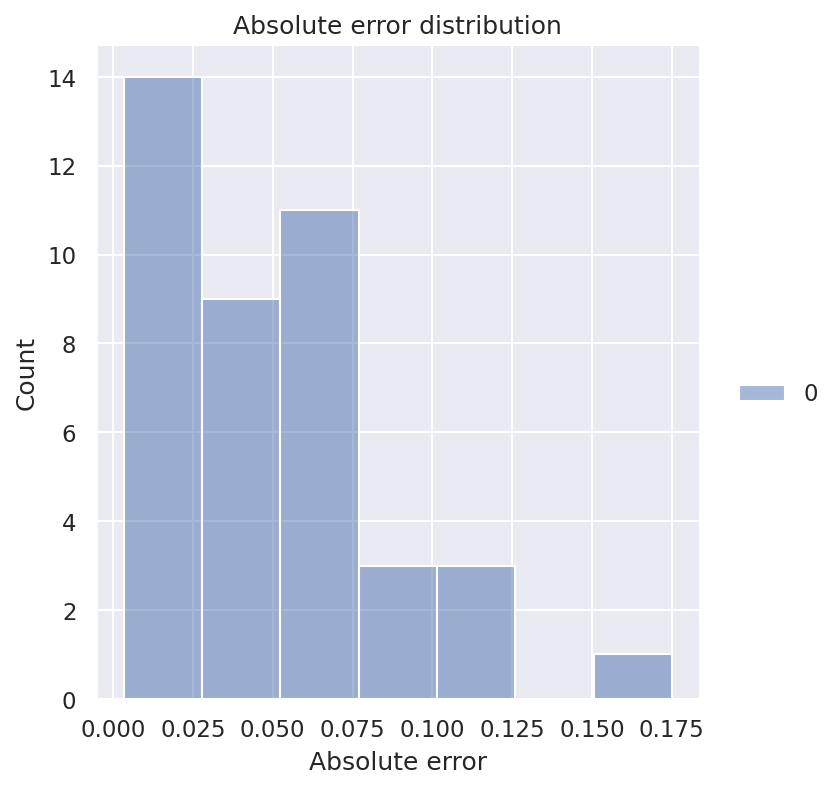

In [ ]:
sns.set(rc={"figure.dpi":150})
sns.displot(abs(y_test - (x_test@weights)), legend = True)
plt.title("Absolute error distribution")
plt.xlabel("Absolute error")


## **Linear reg using sklearn**

In [ ]:
reg2 = sklearn.linear_model.LinearRegression()
reg2.fit(x,y)

LinearRegression()

In [ ]:
pred2 = reg2.predict(x_test)

In [ ]:
calculate_cost(pred2, y_test)

mae =  0.050386607931609324 
mse = 0.0040140983000120705


In [ ]:
calculate_cost(x_test@weights, y_test)

mae =  0.04817131416544659 
mse = 0.0036726956967110544


In [ ]:
mat2 = np.hstack((pred2,y_test))
mat2 = sorted(mat2, key = itemgetter(1))

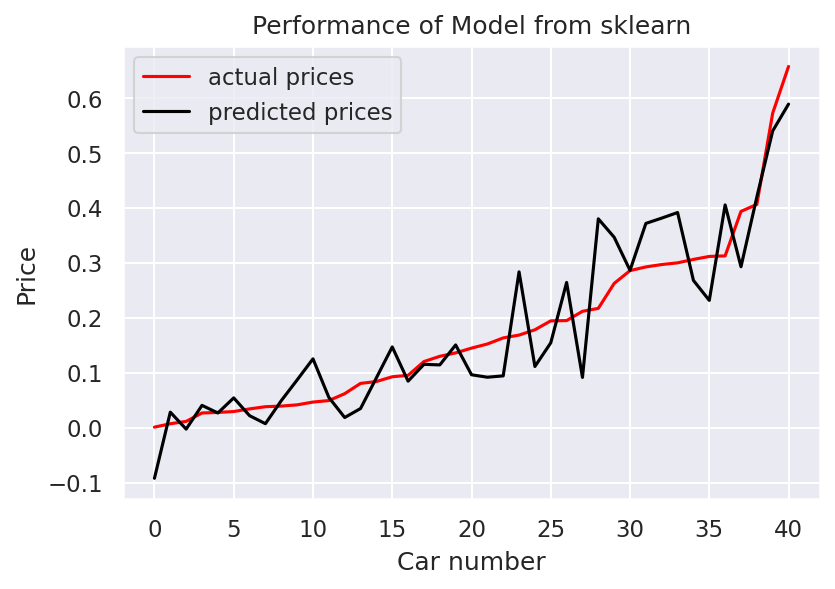

In [ ]:
plt.figure(dpi = 150)
plt.plot([i[1] for i in mat2], color = 'red',label = "actual prices")
plt.plot([i[0] for i in mat2],color = 'black',label = "predicted prices")
plt.xlabel("Car number")
plt.ylabel("Price")
plt.title("Performance of Model from sklearn")
plt.legend(loc="upper left")

###  **Comparison**

In [ ]:
print('mse for sklearn = ',((pred2 - y_test.reshape(41,1))**2).mean(),
      '\nmse for model built from scratch = ',(((x_test@weights) - y_test)**2).mean())

mse for sklearn =  0.0040140983000120705 
mse for model built from scratch =  0.0036726956967110544
